Missing Values:
 Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64
Basic Statistics:
              Salary  Salary in USD         Year
count  3.300000e+03    3300.000000  3300.000000
mean   2.046623e+05  142095.983939  2022.495455
std    7.279383e+05   69028.235512     0.716355
min    1.400000e+04   15000.000000  2020.000000
25%    9.416900e+04   90000.000000  2022.000000
50%    1.400000e+05  136000.000000  2023.000000
75%    1.900000e+05  185000.000000  2023.000000
max    3.040000e+07  450000.000000  2023.000000
Column 'Title' not found in the DataFrame.
Column 'Company' not found in the DataFrame.
Column 'Location' not found in the DataFrame.
Column 'Headquarters' not found in the DataFrame.
Column 'Size' not found in the DataFrame.
Column 'Founded' not found in

f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


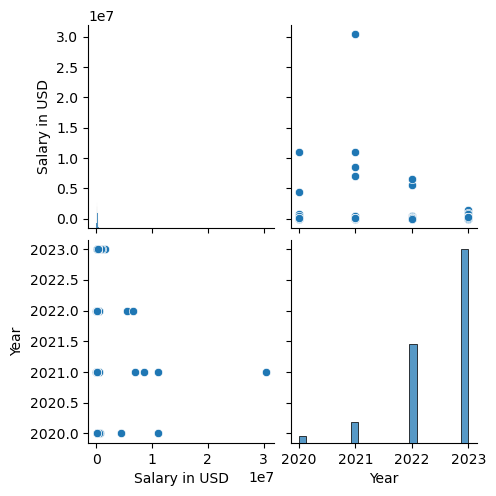

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
file_path = "../Data/Latest_Data_Science_Salaries.csv"
df = pd.read_csv(file_path)

# Data Preprocessing

# Explore the dataset
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:\n", statistics)

# Data cleaning and preprocessing
# Convert Salary to USD for uniformity
df['Salary in USD'] = df.apply(lambda row: row['Salary'] if row['Salary Currency'] == 'United States Dollar' else row['Salary']*1.18 if row['Salary Currency'] == 'Euro' else row['Salary']*1.39 if row['Salary Currency'] == 'British Pound Sterling' else row['Salary']*0.011 if row['Salary Currency'] == 'Indian Rupee' else row['Salary'], axis=1)

# Remove unnecessary columns related to currency conversion
df.drop(['Salary', 'Salary Currency'], axis=1, inplace=True)

# Remove unnecessary columns individually
columns_to_drop = ['Title', 'Company', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

for column in columns_to_drop:
    try:
        df.drop(column, axis=1, inplace=True)
    except KeyError:
        print(f"Column '{column}' not found in the DataFrame.")

# Remove rows with missing values
df.dropna(inplace=True)

# Explore the cleaned dataset
print("Cleaned Dataset:\n", df.head())

# Visualize the cleaned dataset
sns.pairplot(df)
plt.show()

In [17]:
# Exploratory Data Analysis (EDA)
# ... (additional EDA based on project-specific insights)

# Machine Learning
# Select features and target variable
features = df[['Job Title', 'Experience Level', 'Company Location']]
target = df['Salary in USD']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in features.columns:
    features.loc[:, column] = label_encoder.fit_transform(features[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error for ML Model: {mse}')

#ML model evaluation vs. simple baseline model

# Calculate the mean salary
mean_salary = df['Salary in USD'].mean()

# Create an array of mean salary predictions with the same length as the test set
mean_salary_predictions = [mean_salary] * len(y_test)

# Calculate the mean squared error for the mean salary predictions
mean_salary_mse = mean_squared_error(y_test, mean_salary_predictions)

# Print the mean squared error for the mean salary predictions
print(f'Mean Squared Error for Mean Salary Predictions: {mean_salary_mse}')

mse_difference = mse - mean_salary_mse
print(f'Mean Squared Error Difference: {mse_difference}')

Mean Squared Error for ML Model: 68244083885.04575
Mean Squared Error for Mean Salary Predictions: 67771017893.20575
Mean Squared Error Difference: 473065991.84000397


Mean Squared Error (Decision Tree): 62814373127.470924


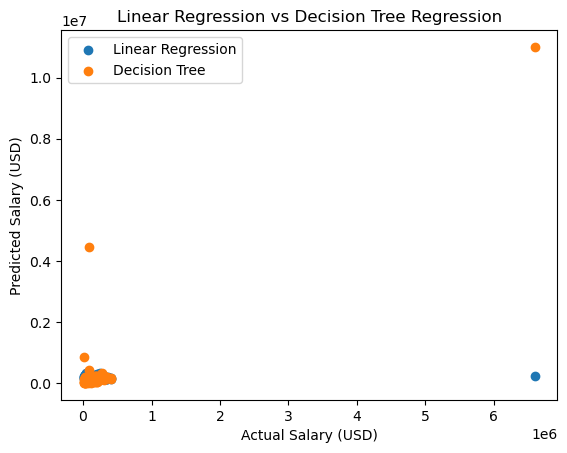

In [18]:
# Visualization
# ... (visualize predicted vs actual salaries using Matplotlib or Plotly)
# Machine Learning (Decision Tree Regressor)
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Make predictions using Decision Tree Regressor
predictions_dt = model_dt.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, predictions_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

# Visualization (Predicted vs Actual)
plt.scatter(y_test, predictions, label='Linear Regression')
plt.scatter(y_test, predictions_dt, label='Decision Tree')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Linear Regression vs Decision Tree Regression')
plt.legend()
plt.show()
# Provide insights and recommendations to fresh data science students based on the analysis
